# Day 18: Many-Worlds Interpretation

https://adventofcode.com/2019/day/18

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open("input18.txt") as f:
    lines = [l.rstrip('\n') for l in f]
lines

['#################################################################################',
 '#.....#.#...#...........Z...........#...#.......#...#...........#.........#.....#',
 '#.###.#.#.#.#.###########.#########.###.#.#####.#.#.#.#.#######.#####.###.#.###.#',
 '#.#.....#.#.#.#b#.......#...#...#.#...#.#.#...#...#.#.#...#...#...#...#.#.#...#.#',
 '#M#######.#.#.#.#.###.#####.#.#.#.###.#.#.###.#####.#.###.#.#.###.#.###.#.###.#.#',
 '#.........#.#.#.#...#.....#.#.#.....#.#.#...#.....#.....#.#.#...#...#.....#...#.#',
 '#.#########.#.#.###.#####.#.#.#####.#.#.###.#.###.#######.#.###.#####.#####.###.#',
 '#...#.....#...#.....#.....#.#.....#.#...#.#.#.#.....#...#.#.#.#.....#.....#.#.#.#',
 '###.###.#.###########.###.#.#####.#####.#.#.#.#######.#.#.#.#.###.#######.#.#.#.#',
 '#...#.T.#.#...........#...#.....#.......#.#.#...#.....#...#.#...#.......#...#.#.#',
 '#.###.###.#.###########.#######.###.#####.#.###.#.#########.###.#######.#####.#.#',
 '#.....#.#.#.#.........#.#.....#...#.#...#.......#...

In [5]:
WALL  = 1
EMPTY = 0
START = 0
DOOR  = 4
KEY   = 5

nrow = len(lines)
ncol = len(lines[0])
shape = (nrow,ncol)
maze = np.zeros(shape)
x0 = np.zeros(2)

doors = {}
keys = {}

j = 0
for l in lines:
    i = 0
    for c in l:
        if c=='#':
            maze[j][i] = WALL
        elif c=='.':
            maze[j][i] = EMPTY
        elif c=='@':
            maze[j][i] = START
            x0 = np.array([j,i])
        else:
            if c.isupper():
                maze[j][i] = DOOR
                doors[c] = [j,i]
            else:
                maze[j][i] = KEY
                keys[c] = [j,i]
        i+=1
    j+=1

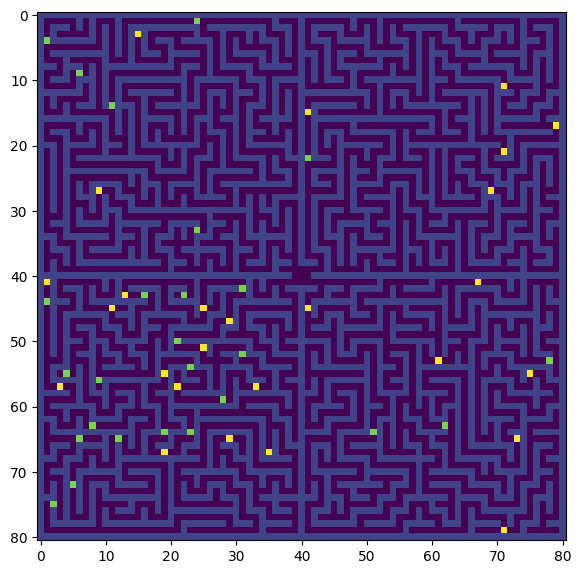

In [6]:
fig = plt.figure(figsize=(7, 7), dpi=100)
plt.imshow(maze)

A few ideas about how to solve this (when I'll have the time)

- Run "flooding" algorithm (similar to that used for "oxigen" problem on Day 15) to find closest key and closest door
- Find shortest path from found key to closest key and to door corresponding to found key. Door might be inaccessible.
- If door closest go there and open it, otherwise go to next key. Repeat.

In [18]:
EMPTY = 0
WALL  = 1
EXIT  = 2
SEEN  = 3
BACKTRACK = 4

EMPTY = 0
SEEN  = 3

N = 1
S = 2
W = 3
E = 4

def exploreMaze(maze,row,col):    
    if maze[row][col]==EXIT:
        return True
    elif maze[row][col]==EMPTY: # Empty path, not yet explored
        maze[row][col]=SEEN
        if row<len(maze)-1:
            # Explore path below
            if exploreMaze(maze,row+1,col):
                return True
        if row>0:
            # Explore path above
            if exploreMaze(maze,row-1,col):
                return True
        if col<len(maze[row])-1:
            # Explore path to the right
            if exploreMaze(maze,row,col+1):
                return True
        if col>0:
            # Explore path to the left
            if exploreMaze(maze,row,col-1):
                return True
        # Backtrack
        maze[row][col]=BACKTRACK    

def move(d,x): ## x = [j,i]
    x1 = np.copy(x)
    if   d==N:
        x1 += np.array([+1,0])
    elif d==S:
        x1 += np.array([-1,0])
    elif d==W:
        x1 += np.array([0,-1])
    elif d==E:
        x1 += np.array([0,+1])
    else:
        print("Illegal movement!")
    return x1

def exploreAdjacents(maze,x0list,TARGET):
    adj = []
    for x0 in x0list:
        xN = move(N,x0)
        xS = move(S,x0)
        xW = move(W,x0)
        xE = move(E,x0)
        dirs = [ xN, xS, xW, xE ]
        for d in dirs:
            if maze[d[0]][d[1]] == EMPTY:
                maze[d[0]][d[1]] = SEEN
                adj.append(d)
            elif maze[d[0]][d[1]] == TARGET:
                adj.append(d)  
    return adj

def findClosestTarget(maze,IN,TARGET,name=""):
    maze_ = maze.copy()
    adj = [ IN ]
    p = IN
    while(len(maze_[maze_==EMPTY])):
        newadj = exploreAdjacents(maze_,adj,TARGET)
        adj = list(newadj)
        for p in adj:
            if  maze[p[0]][p[1]] == TARGET:
                print("Found closest",name,"at",p)
                return p, maze_
    return p, maze_

In [19]:
p, maze_ = findClosestTarget(maze,x0,KEY,"key")

Found closest key at [45 41]


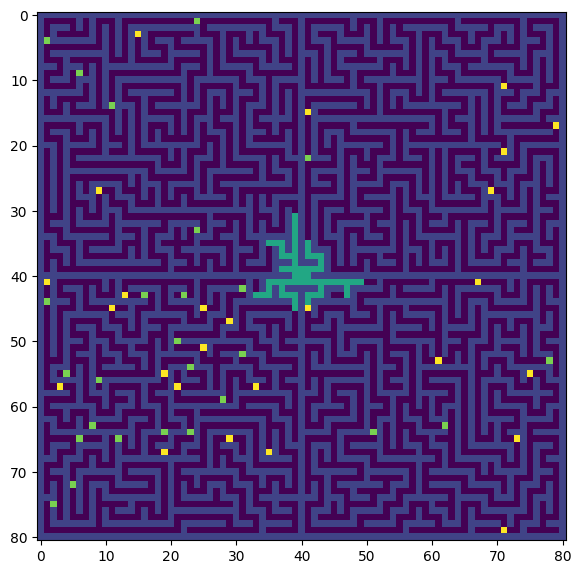

In [20]:
fig = plt.figure(figsize=(7, 7), dpi=100)
plt.imshow(maze_)

In [21]:
def keyName(p):
    '''Returns key name according to position'''
    for k in keys.keys():
        _k = np.array(keys[k])
        _p = np.array(p)
        if np.equal(_k,_p).sum()==2:
            return k
        
kn = keyName(p)
dp = doors[kn.upper()]
print(kn,dp)

q [22, 41]


Starting search at [40 40]
Found closest key at [45 41]
Key name = q --> door Q is at [22, 41]
Door at [22, 41] can be opened!
Starting search at [22, 41]
Found closest key at [15 41]
Key name = a --> door A is at [64, 51]
Door at [64, 51] can be opened!
Starting search at [64, 51]
Found closest key at [79 71]
Key name = t --> door T is at [9, 6]
Door at [9, 6] cannot be reached, go search for a new key...
Starting search at [79 71]
Found closest key at [79 71]
Key name = t --> door T is at [9, 6]
Door at [9, 6] cannot be reached, go search for a new key...
['q', 'a']
['Q', 'A']
['T', 'T']


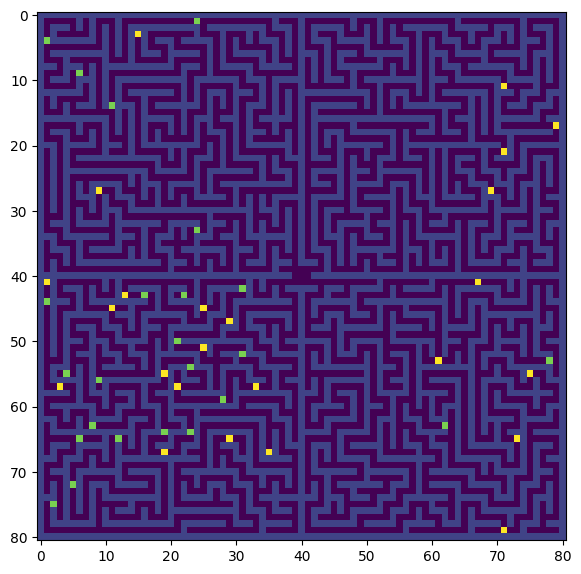

In [22]:
mazerun = maze.copy()
havekeys = []
opendoors = []
closedwithkeys = []

def openDoor(mazerun,dp,p):
    mazetest = mazerun.copy()
    mazetest[mazetest==KEY] = EMPTY # temporary remove all keys
    mazetest[mazetest==DOOR] = WALL # close all doors
    mazetest[dp[0],dp[1]] = EXIT # mark current door ar EXIT
    # run backtracking from key to door
    opened = exploreMaze(mazetest,p[0],p[1])
    # check whether door can be opened
    if opened: 
        # Open door
        print("Door at",dp,"can be opened!")
        opendoors.append(kn.upper())
        mazerun[dp[0],dp[1]] = EMPTY
        # current position is last door location
        return True, dp
    else:
        closedwithkeys.append(kn.upper())
        print("Door at",dp,"cannot be reached, go search for a new key...")
        return False, p

isteps = 0
imax = 4

while(isteps<imax):
    
    print("Starting search at",x0)
    # Look for closest accessible key
    p, m_ = findClosestTarget(mazerun,x0,KEY,"key")
    # get key name from position
    kn = keyName(p)
    print("Key name =",kn,end=" ")   
    # get corresponsing door position
    dp = doors[kn.upper()]
    print("--> door",kn.upper(),"is at", dp)

    # try to open door
    opened, x0 = openDoor(mazerun,dp,p)
    if opened:
        # mark key as collected
        havekeys.append(kn)
        mazerun[p[0],p[1]] = EMPTY   
    
    isteps+=1 

print(havekeys)
print(opendoors)
print(closedwithkeys)

fig = plt.figure(figsize=(7, 7), dpi=100)
plt.imshow(mazerun)